In [0]:
fileName = "dbfs:/FileStore/tables/people/dim-1.csv"
df_people=spark.read.format("csv").option("header",True).option("inferSchema", True).load(fileName)

In [0]:
df_people.select("h","w").show()

+---+---+
 h| w|
+---+---+
167| 60|
155| 51|
178| 70|
159| 50|
198| 92|
181| 90|
164| 49|
177| 71|
181| 70|
189| 79|
177| 64|
167| 56|
168| 60|
190|101|
201| 89|
171| 69|
170| 87|
161| 55|
180| 73|
178| 75|
+---+---+
only showing top 20 rows

In [0]:
from pyspark.ml.feature import VectorAssembler
vectorizer = VectorAssembler()
col=["h","w"]
vectorizer.setInputCols(col)
vectorizer.setOutputCol("features")

Out[59]: VectorAssembler_f929b2377841

In [0]:
# Trains a k-means model.
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

kmeans = KMeans()
print(kmeans.explainParams())



distanceMeasure: the distance measure. Supported options: 'euclidean' and 'cosine'. (default: euclidean)
featuresCol: features column name. (default: features)
initMode: The initialization algorithm. This can be either "random" to choose random points as initial cluster centers, or "k-means||" to use a parallel variant of k-means++ (default: k-means||)
initSteps: The number of steps for k-means|| initialization mode. Must be > 0. (default: 2)
k: The number of clusters to create. Must be > 1. (default: 2)
maxIter: max number of iterations (>= 0). (default: 20)
predictionCol: prediction column name. (default: prediction)
seed: random seed. (default: 7969353092125344463)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 0.0001)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)

In [0]:
K_CLUSTERS = 3
MAX_ITERATIONS = 25
SEED = 5

# Now we set the parameters for the method
kmeans = KMeans().setK(K_CLUSTERS).setMaxIter(MAX_ITERATIONS).setSeed(SEED)

clusteringPipeline = Pipeline()

# We will use the new spark.ml pipeline API. If you have worked with scikit-learn this will be very familiar.
clusteringPipeline.setStages([vectorizer, kmeans])

# Let's train on the entire dataset to see what we get
clusteringModel = clusteringPipeline.fit(df_people)



In [0]:
for k in range(2,7):
  
  kmeans = KMeans().setK(k).setMaxIter(MAX_ITERATIONS).setSeed(SEED)  
  normalizedClusteringPipeline.setStages([vectorizer,normalizer, kmeans])
  clusteringModel = normalizedClusteringPipeline.fit(dataset)  
  predictions=clusteringModel.transform(dataset)
  
  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(predictions)
  print("Silhouette with squared euclidean distance = [" + str(k) + "]" + str(silhouette))

In [0]:
centers = clusteringModel.stages[1].clusterCenters()
print("Centroids: ")
for center in centers:
    print(center)
    centroid1=center

Centroids: 
[162.46153846 53.69230769]
[192.14285714 88. ]
[176.25 72.08333333]

In [0]:
# Evaluate clustering by computing Silhouette score

predictions = clusteringModel.transform(df_people)


In [0]:
predictions.show()

+---+---+---+-------------+----------+
 h| w| t| features|prediction|
+---+---+---+-------------+----------+
167| 60| 1| [167.0,60.0]| 0|
155| 51| 1| [155.0,51.0]| 0|
178| 70| 0| [178.0,70.0]| 2|
159| 50| 1| [159.0,50.0]| 0|
198| 92| 0| [198.0,92.0]| 1|
181| 90| 0| [181.0,90.0]| 1|
164| 49| 1| [164.0,49.0]| 0|
177| 71| 0| [177.0,71.0]| 2|
181| 70| 0| [181.0,70.0]| 2|
189| 79| 0| [189.0,79.0]| 1|
177| 64| 1| [177.0,64.0]| 2|
167| 56| 1| [167.0,56.0]| 0|
168| 60| 1| [168.0,60.0]| 0|
190|101| 0|[190.0,101.0]| 1|
201| 89| 0| [201.0,89.0]| 1|
171| 69| 1| [171.0,69.0]| 2|
170| 87| 0| [170.0,87.0]| 2|
161| 55| 1| [161.0,55.0]| 0|
180| 73| 0| [180.0,73.0]| 2|
178| 75| 0| [178.0,75.0]| 2|
+---+---+---+-------------+----------+
only showing top 20 rows

## PLOT DATA

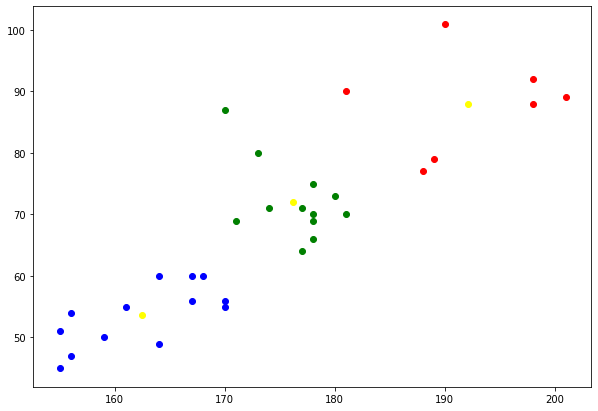

In [0]:
class1=predictions.where("prediction==1")
class2=predictions.where("prediction==0")
class3=predictions.where("prediction==2")

class1X=class1.select("h").collect()
class1Y=class1.select("w").collect()
class2X=class2.select("h").collect()
class2Y=class2.select("w").collect()
class3X=class3.select("h").collect()
class3Y=class3.select("w").collect()

#centroid1=[164, 55.4]
#centroid2=[183.05882353,79.29411765]

centroid1=[162.46153846, 53.69230769]
centroid2=[192.14285714,88.]
centroid3=[176.25,72.08333333]


from matplotlib import pyplot as plt
plt.scatter(class1X,class1Y,color='red')
plt.scatter(class2X,class2Y,color='blue')
plt.scatter(class3X,class3Y,color='green')
plt.scatter(centroid1[0],centroid1[1],color='yellow')
plt.scatter(centroid2[0],centroid2[1],color='yellow')
plt.scatter(centroid3[0],centroid3[1],color='yellow')
plt.rcParams["figure.figsize"] = (10,7)
plt.show()